In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, FastICA

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv('./Homework1_1.csv', header=None)
df.columns = df.columns.astype(str)

In [4]:
# label = pd.DataFrame(columns=['class'], index=df.index)

# for i in label.index:
#     if i < 100:
#         label.loc[i, 'class'] = 1
#     elif i < 200:
#         label.loc[i, 'class'] = 2
#     else:
#         label.loc[i, 'class'] = 3
        
# label['class'] = label['class'].astype('category')
# label.to_csv('sig-label.csv')

In [5]:
# df_w_class = pd.concat([label, df], axis=1)
# df_w_class.to_csv('synth-sig-w-class.csv')

In [6]:
label = pd.read_csv('./sig-label.csv', index_col='Unnamed: 0')
label

,class
0,1
1,1
2,1
3,1
4,1
...,...
295,3
296,3
297,3
298,3


# Normalising Data -- Standardisatoion conducted
- for PCA, normalising data will improve its performance. https://machinelearningmastery.com/principal-component-analysis-for-visualization/

- ICA: https://towardsdatascience.com/introduction-to-ica-independent-component-analysis-b2c3c4720cd9

# HW 1: Separate 3 Mixed Signals
- https://github.com/akcarsten/Independent_Component_Analysis ***for more understanding***

In [111]:
dt = pd.read_csv('./Homework1_2.csv', header=None)
dt

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,26.457721,6.373042,24.406436,-21.420511,-46.703654,5.891017,-18.012103,56.829872,-21.871273,42.978627,-29.108275,-6.698777,32.272178,-18.662368,-2.061580,-2.299116,5.125023,-49.228321,55.760879,11.234361,-14.990338,-45.536815,-35.619598,-18.388911,27.280419,37.578996,15.458865,-2.007697,-35.156316,-23.760977,3.041349,-35.442231,-10.278091,40.431621,16.406814,0.011699,29.720167,-40.324473,-37.652082,-11.544834,5.144532,-46.710109,34.194084,-42.444250,31.805484,-39.959518,20.032946,41.021058,32.050171,26.592997,-10.433834,13.435092,52.523531,-3.874719,-12.330504,3.633880,-47.078784,36.485556,39.828980,-44.407339
1,25.779513,16.231147,27.094654,-18.071918,-34.640614,13.241859,-13.906859,61.356120,-19.921072,46.689437,-18.512865,3.745557,41.224511,-7.164441,4.708875,5.857856,16.509455,-34.177493,63.534693,14.114177,-7.641113,-35.477316,-23.056885,-20.171455,30.645110,34.744877,18.020072,-8.015254,-42.248829,-23.943860,-6.770960,-31.683030,-19.095058,31.560877,14.132623,-3.989430,25.580950,-47.008981,-41.926470,-22.912507,4.459488,-43.472972,26.586578,-44.745418,19.574386,-43.483768,4.934159,38.547264,30.705422,20.930864,-23.065422,-0.191710,44.125284,-7.176445,-22.848881,3.151831,-44.786313,36.383408,35.933678,-49.997388
2,-10.221810,1.482440,-8.163424,10.198639,23.175781,1.011951,8.776835,-20.302510,8.843920,-15.738883,14.801548,6.234125,-9.103315,11.485449,3.426512,4.564833,3.016610,25.026624,-18.381178,-3.050334,8.325784,20.994984,17.924452,5.501897,-9.677506,-15.613799,-4.747062,-1.183775,11.487246,9.633151,-4.651450,15.497974,0.444301,-19.223810,-7.714209,-2.461812,-13.431951,12.445531,12.798419,0.200497,-1.629085,19.496966,-15.315728,15.808066,-17.035246,13.799230,-14.146379,-17.418156,-13.235058,-12.832760,-1.250880,-10.731002,-23.037597,0.715574,0.915156,-0.903180,19.424042,-14.003091,-16.826937,14.573394


In [115]:
scaled_dt = StandardScaler().fit_transform(dt.T)
scaled_dt.shape

(60, 3)

In [146]:
from scipy.stats import kurtosis
kurtosis_value = kurtosis(scaled_dt)


"""Interpretation of kurtosis values:

- A kurtosis value close to 0 suggests a distribution similar to a normal distribution.
- Positive kurtosis indicates heavy tails (more outliers) compared to a normal distribution.
- Negative kurtosis indicates lighter tails (fewer outliers) compared to a normal distribution
"""

'Interpretation of kurtosis values:\n\n- A kurtosis value close to 0 suggests a distribution similar to a normal distribution.\n- Positive kurtosis indicates heavy tails (more outliers) compared to a normal distribution.\n- Negative kurtosis indicates lighter tails (fewer outliers) compared to a normal distribution\n'

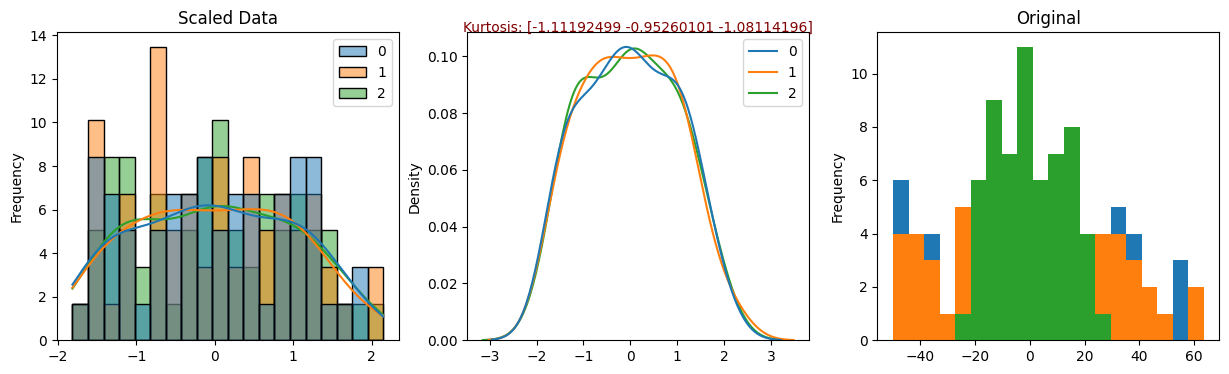

In [147]:
plt.figure(figsize=(15,4)).tight_layout()
ax = plt.subplot(1,3,1)
ax.set_title('Scaled Data')

sns.histplot(scaled_dt, stat='frequency', kde=True, bins=20, ax=ax)
sns.kdeplot(scaled_dt, ax=plt.subplot(1,3,2))
#check if data is normal
plt.annotate(f'Kurtosis: {kurtosis_value}', xy=(0.5, 1), xycoords='axes fraction', ha='center', fontsize=10, color='maroon')

dt.T.plot(kind='hist', bins=20, legend=False, title='Original', ax=plt.subplot(1,3,3))


plt.show()

In [40]:
ica_m = FastICA(n_components=3, random_state=42)
ica_com = ica_m.fit_transform(scaled_dt)

In [43]:
pca_m =PCA(n_components=3,random_state=42)
pca_com = pca_m.fit_transform(scaled_dt)


In [44]:
ica_com.shape , pca_com.shape

((60, 3), (60, 3))

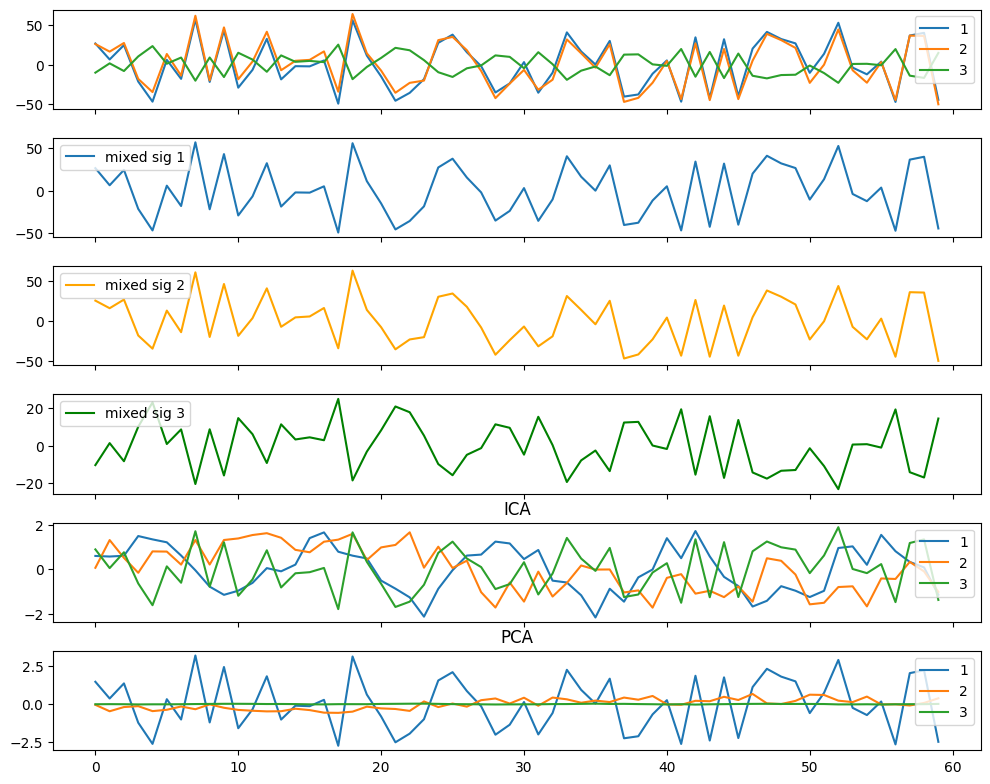

In [87]:
#ALL PLOTS COMBINED
fig, ax = plt.subplots(nrows=6,ncols=1, figsize=(10,8), sharex=True)
fig.tight_layout()
ax[0].plot(dt.T, label=(dt.index +1))
ax[0].legend()

ax[1].plot(dt.loc[0].T, label= 'mixed sig 1')
ax[2].plot(dt.loc[1].T, label= 'mixed sig 2', c='orange')
ax[3].plot(dt.loc[2].T, label= 'mixed sig 3', c='green')
ax[1].legend()
ax[2].legend()
ax[3].legend()

ax[4].set_title('ICA')
ax[4].plot(ica_com, label=dt.index+1)
ax[4].legend()

ax[5].set_title('PCA')
ax[5].plot(pca_com, label=dt.index+1)
ax[5].legend()

plt.show()

In [122]:
def plot_trans_sig(com, palette, col):
    for i in range(com.shape[1]):
       sns.lineplot(com[:, i], color=pal[i],ax=ax[i][col], label=f'Component {i+1}')
     # ax[i][col]

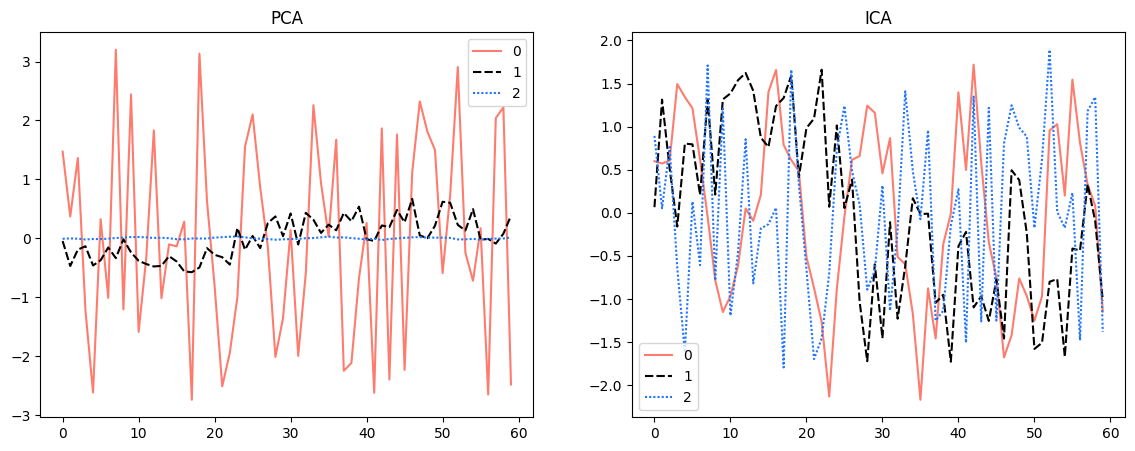

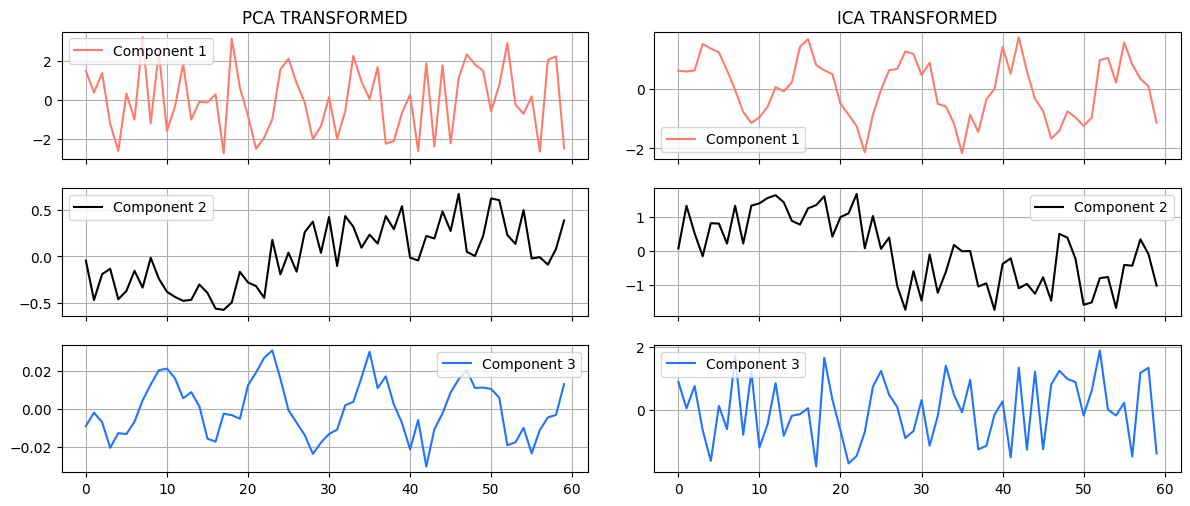

In [123]:
#RESULTS OF PCA AND ICA
pal=sns.crayon_palette(sns.crayons)[8:11]

#ALL THREE TOGETHER 
plt.figure(figsize=(14,5)).tight_layout()
plt.subplot(1,2,1).set_title('PCA')
sns.lineplot(pca_com, ax=plt.subplot(1,2,1), palette=pal)

plt.subplot(1,2,2).set_title('ICA')
sns.lineplot(ica_com, ax=plt.subplot(1,2,2), palette=pal)
plt.show()

#EACH SOURCE SIGNALS
fig, ax = plt.subplots(3,2,sharex=True, figsize=(12,5))
fig.tight_layout()
ax[0][0].set_title('PCA TRANSFORMED')
plot_trans_sig(pca_com, pal, 0)
# sns.lineplot(pca_com[:,0], ax=ax[1][0])
# sns.lineplot(pca_com[:,1], ax=ax[2][0])
# sns.lineplot(pca_com[:,2], ax=ax[3][0])
ax[0][1].set_title('ICA TRANSFORMED')
plot_trans_sig(ica_com, pal, 1)
# sns.lineplot(ica_com[:,0], ax=ax[1][1])
# sns.lineplot(ica_com[:,1], ax=ax[2][1])
# sns.lineplot(ica_com[:,2], ax=ax[3][1])


for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i][j].grid()
        ax[i][j].legend()

plt.show()

In [267]:
sns.crayon_palette(sns.crayons)

[(0.9372549019607843, 0.8705882352941177, 0.803921568627451),
 (0.803921568627451, 0.5843137254901961, 0.4588235294117647),
 (0.9921568627450981, 0.8509803921568627, 0.7098039215686275),
 (0.47058823529411764, 0.8588235294117647, 0.8862745098039215),
 (0.5294117647058824, 0.6627450980392157, 0.4196078431372549),
 (1.0, 0.6431372549019608, 0.4549019607843137),
 (0.9803921568627451, 0.9058823529411765, 0.7098039215686275),
 (0.6235294117647059, 0.5058823529411764, 0.4392156862745098),
 (0.9921568627450981, 0.48627450980392156, 0.43137254901960786),
 (0.0, 0.0, 0.0),
 (0.12156862745098039, 0.4588235294117647, 0.996078431372549),
 (0.6352941176470588, 0.6352941176470588, 0.8156862745098039),
 (0.050980392156862744, 0.596078431372549, 0.7294117647058823),
 (0.45098039215686275, 0.4, 0.7411764705882353),
 (0.8705882352941177, 0.36470588235294116, 0.5137254901960784),
 (0.796078431372549, 0.2549019607843137, 0.32941176470588235),
 (0.7058823529411765, 0.403921568627451, 0.30196078431372547),
 (1.0, 0.4980392156862745, 0.28627450980392155),
 (0.9176470588235294, 0.49411764705882355, 0.36470588235294116),
 (0.6901960784313725, 0.7176470588235294, 0.7764705882352941),
 (1.0, 1.0, 0.6),
 (0.0, 0.8, 0.6),
 (1.0, 0.6666666666666666, 0.8),
 (0.8666666666666667, 0.26666666666666666, 0.5725490196078431),
 (0.11372549019607843, 0.6745098039215687, 0.8392156862745098),
 (0.7372549019607844, 0.36470588235294116, 0.34509803921568627),
 (0.8666666666666667, 0.5803921568627451, 0.4588235294117647),
 (0.6039215686274509, 0.807843137254902, 0.9215686274509803),
 (1.0, 0.7372549019607844, 0.8509803921568627),
 (0.9921568627450981, 0.8588235294117647, 0.42745098039215684),
 (0.16862745098039217, 0.4235294117647059, 0.7686274509803922),
 (0.9372549019607843, 0.803921568627451, 0.7215686274509804),
 (0.43137254901960786, 0.3176470588235294, 0.3764705882352941),
 (0.807843137254902, 1.0, 0.11372549019607843),
 (0.44313725490196076, 0.7372549019607844, 0.47058823529411764),
 (0.42745098039215684, 0.6823529411764706, 0.5058823529411764),
 (0.7647058823529411, 0.39215686274509803, 0.7725490196078432),
 (0.8, 0.4, 0.4),
 (0.9058823529411765, 0.7764705882352941, 0.592156862745098),
 (0.9882352941176471, 0.8509803921568627, 0.4588235294117647),
 (0.6588235294117647, 0.8941176470588236, 0.6274509803921569),
 (0.5843137254901961, 0.5686274509803921, 0.5490196078431373),
 (0.10980392156862745, 0.6745098039215687, 0.47058823529411764),
 (0.9411764705882353, 0.9098039215686274, 0.5686274509803921),
 (1.0, 0.11372549019607843, 0.807843137254902),
 (0.6980392156862745, 0.9254901960784314, 0.36470588235294116),
 (0.36470588235294116, 0.4627450980392157, 0.796078431372549),
 (0.792156862745098, 0.21568627450980393, 0.403921568627451),
 (0.23137254901960785, 0.6901960784313725, 0.5607843137254902),
 (0.996078431372549, 0.996078431372549, 0.13333333333333333),
 (0.9882352941176471, 0.7058823529411765, 0.8352941176470589),
 (1.0, 0.7411764705882353, 0.5333333333333333),
 (0.9647058823529412, 0.39215686274509803, 0.6862745098039216),
 (0.803921568627451, 0.2901960784313726, 0.2980392156862745),
 (0.592156862745098, 0.6039215686274509, 0.6666666666666666),
 (1.0, 0.5098039215686274, 0.2627450980392157),
 (0.7843137254901961, 0.2196078431372549, 0.35294117647058826),
 (0.9372549019607843, 0.596078431372549, 0.6666666666666666),
 (0.9921568627450981, 0.7372549019607844, 0.7058823529411765),
 (0.10196078431372549, 0.2823529411764706, 0.4627450980392157),
 (0.18823529411764706, 0.7294117647058823, 0.5607843137254902),
 (0.09803921568627451, 0.4549019607843137, 0.8235294117647058),
 (1.0, 0.6392156862745098, 0.2627450980392157),
 (0.7294117647058823, 0.7215686274509804, 0.4235294117647059),
 (1.0, 0.4588235294117647, 0.2196078431372549),
 (0.9019607843137255, 0.6588235294117647, 0.8431372549019608),
 (0.2549019607843137, 0.2901960784313726, 0.2980392156862745),
 (1.0, 0.43137254901960786, 0.2901960784313726),
 (0.10980392156862745, 0.6627450980392157, 0.788235294117647),
 (1.0, 0

# HW2

In [169]:
# 1 - 100   Normal (class 1)
# 101-200  Cyclic (class 2)
# 201-300  Upward shift (class 3)
train_normal = df.loc[:49, :] #first 50 of normal signal data as TRAINING
test = df.loc[50:99] # another rest of normal data -- 50 data as TEST SET 
print(train_normal.shape, test.shape)
train_normal

(50, 60) (50, 60)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,28.7812,34.4632,31.3381,31.2834,28.9207,33.7596,25.3969,27.7849,35.2479,27.1159,32.8717,29.2171,36.0253,32.3370,34.5249,32.8717,34.1173,26.5235,27.6623,26.3693,25.7744,29.2700,30.7326,29.5054,33.0292,25.0400,28.9167,24.3437,26.1203,34.9424,25.0293,26.6311,35.6541,28.4353,29.1495,28.1584,26.1927,33.3182,30.9772,27.0443,35.5344,26.2353,28.9964,32.0036,31.0558,34.2553,28.0721,28.9402,35.4973,29.7470,31.4333,24.5556,33.7431,25.0466,34.9318,34.9879,32.4721,33.3759,25.4652,25.8717
1,24.8923,25.7410,27.5532,32.8217,27.8789,31.5926,31.4861,35.5469,27.9516,31.6595,27.5415,31.1887,27.4867,31.3910,27.8110,24.4880,27.5918,35.6273,35.4102,31.4167,30.7447,24.1311,35.1422,30.4719,31.9874,33.6615,25.5511,30.4686,33.6472,25.0701,34.0765,32.5981,28.3038,26.1471,26.9414,31.5203,33.1089,24.1491,28.5157,25.7906,35.9519,26.5301,24.8578,25.9562,32.8357,28.5322,26.3458,30.6213,28.9861,29.4047,32.5577,31.0205,26.6418,28.4331,33.6564,26.4244,28.4661,34.2484,32.1005,26.6910
2,31.3987,30.6316,26.3983,24.2905,27.8613,28.5491,24.9717,32.4358,25.2239,27.3068,31.8387,27.2587,28.2572,26.5819,24.0455,35.0625,31.5717,32.5614,31.0308,34.1202,26.9337,31.4781,35.0173,32.3851,24.3323,30.2001,31.2452,26.6814,31.5137,28.8778,27.3086,24.2460,26.9631,25.2919,31.6114,24.7131,27.4809,24.2075,26.8059,35.1253,32.6293,31.0561,26.3583,28.0861,31.4391,27.3057,29.6082,35.9725,34.1444,27.1717,33.6318,26.5966,25.5387,32.5434,25.5772,29.9897,31.3510,33.9002,29.5446,29.3430
3,25.7740,30.5262,35.4209,25.6033,27.9700,25.2702,28.1320,29.4268,31.4549,27.3200,28.9564,28.9916,29.9578,30.2773,30.4447,24.3037,24.3140,35.0966,25.3679,32.0968,33.3303,25.0102,35.3155,31.6264,29.2806,34.2021,26.5077,32.2279,25.5265,24.8240,27.5587,28.3714,32.3667,26.9752,35.9346,35.1146,24.3749,27.6083,27.8433,29.8557,32.4185,26.8908,31.3209,29.3849,34.3336,24.7381,35.7690,31.8725,34.2054,31.1560,34.6292,28.7261,28.2979,31.5787,34.6156,32.5492,30.9827,24.8938,27.3659,25.3069
4,27.1798,29.2498,33.6928,25.6264,24.6555,28.9446,35.7980,34.9446,24.5596,34.2366,27.9634,25.3216,35.4154,34.8620,25.1472,29.4686,33.1739,31.1274,31.3701,26.5173,28.6486,31.6565,35.9497,33.0321,24.6081,33.2025,27.4335,32.6355,35.8773,28.0295,33.1247,33.4129,26.9245,30.2123,29.6526,30.8644,24.5119,33.9931,33.3094,33.2040,31.2651,27.9072,35.1110,35.0757,33.8330,25.9481,29.1348,24.2875,32.3223,34.9244,27.7218,27.9601,35.7198,27.5760,35.3375,29.9993,34.2149,33.1276,31.1057,31.0179
5,25.5067,29.7929,28.0765,34.4812,33.8000,27.6671,30.6122,25.6393,30.1171,26.5188,30.1524,27.8514,29.5582,32.3601,29.2064,26.1001,33.4677,33.9010,29.2674,34.8311,31.9815,26.4960,32.6645,27.7188,35.7385,32.8309,30.1509,30.5593,27.3321,27.4559,24.2361,34.7268,29.9207,27.2730,35.9963,32.3917,27.1390,26.4589,25.0466,35.5002,27.9961,25.8897,31.3951,30.7583,34.9652,28.0919,35.6706,33.4401,28.4580,31.1795,26.9458,35.8381,26.7134,25.1641,27.3410,25.2093,33.4669,24.1094,33.1669,35.4907
6,28.6989,29.2101,30.9291,34.6229,31.4138,28.4636,35.9115,32.9058,28.7669,24.2868,34.8983,33.7291,29.1154,26.2804,33.4559,31.6103,33.3061,24.5530,29.1587,27.8378,25.3525,25.2126,26.9565,27.9928,29.5057,31.0723,26.3605,27.7434,34.0438,25.1053,24.4462,35.4191,33.3472,32.2356,24.5244,29.4635,24.6889,28.1962,34.2994,31.6316,30.8005,35.7727,31.3444,25.5691,32.7839,32.7707,24.1047,34.0060,28.8249,24.0499,29.8274,24.0323,31.0756,34.3358,25.4358,25.8930,35.6732,25.1869,29.6669,26.4637
7,30.9493,34.3170,35.5674,34.8829,30.6691,35.2667,35.8950,25.9022,28.8917,32.2092,28.9898,26.0572,31.7516,32.2940,31.0631,24.1612,26.6554,25.2452,30.5956,31.3910,32.1604,33.7765,31.1336,32.6260,28.8616,27.6223,33.9381,33.9836,34.8895,29.4617,34.5734,32.4431,30.0745,25.0495,29.2942,28.2689,28.4819,29.8917,33.1162,26.4574,27.4442,33.0784,33.2286,27.5837,24.4895,26.2151,24.0331,26.4765,34.8568,30.5934,35.4341,31.1248,24.2424,29.7172,35.9365,36.0187,26.38

In [170]:
pca_2 = PCA(random_state=42)
pca_train = pca_2.fit_transform(train_normal)

In [171]:
E_c = pca_2.components_
print(pca_2.n_samples_, pca_2.n_components_, pca_2.n_features_in_, pca_2.components_.shape)
pd.DataFrame(pca_2.components_)

50 50 60 (50, 60)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,-0.120991,-0.007926,-0.200759,-0.257511,0.040664,0.182847,0.011582,0.134383,-0.151404,0.052576,-0.083857,0.017665,0.109914,-0.118418,0.065360,-0.032279,0.114334,-0.026798,0.074159,-0.040385,-0.002858,0.084635,-0.096139,-0.181971,-0.168772,-0.015900,0.076514,0.125503,-0.113050,0.231767,0.175968,-0.117796,-0.059251,0.204636,0.272853,-0.008856,0.177807,0.277625,0.027782,0.039965,0.077730,-0.152010,0.075892,0.080202,0.039426,0.000712,0.122915,-0.231521,-0.070065,0.114401,-0.050449,0.019114,0.237148,0.210596,-0.038756,0.030794,0.181860,0.058530,-0.126722,0.098701
1,0.116171,-0.079932,0.022725,0.057104,-0.006695,-0.047509,0.026194,-0.134342,0.113622,-0.158819,0.224438,0.173124,-0.098920,0.106104,0.093749,0.035290,0.144983,-0.107626,-0.227803,0.044879,-0.036382,0.123847,-0.112926,-0.298670,0.197394,0.122324,0.221647,0.029772,0.157108,0.016426,-0.186502,0.015345,-0.033758,0.033451,-0.011006,-0.244783,0.093892,0.059804,-0.018841,-0.079363,-0.006399,-0.007826,-0.080490,0.055489,-0.065129,0.159557,-0.147697,0.067927,-0.191884,-0.079015,-0.085809,0.040878,0.233987,0.102967,-0.315701,-0.136386,-0.067092,-0.084915,-0.069742,0.193078
2,-0.125800,-0.017067,0.085061,-0.007924,0.090162,0.163458,-0.007656,-0.284501,0.102212,0.061777,0.003264,0.138323,0.129319,-0.118942,0.014508,0.111998,0.037820,-0.231806,-0.104952,-0.224189,0.002812,-0.015505,0.002468,0.003513,0.126542,-0.141488,-0.244380,-0.096346,-0.218963,0.001381,-0.248646,-0.150219,0.159187,0.198393,-0.020801,0.040995,-0.008179,0.053419,0.110500,-0.152461,0.005547,-0.050936,0.070928,-0.139469,0.020582,0.220217,-0.027042,0.164294,0.174108,-0.040334,0.066689,-0.249070,0.131382,0.161802,0.041996,0.158764,-0.044770,0.056915,-0.100863,-0.190881
3,0.077568,0.097308,-0.057633,-0.269329,-0.218846,-0.286526,0.028143,-0.009470,-0.188304,-0.047438,-0.047551,0.075151,0.154131,0.159247,0.132908,0.130536,0.021317,-0.223372,-0.016833,-0.136544,-0.071117,0.129503,0.228841,-0.026586,-0.095336,-0.090243,0.098237,-0.135505,0.157202,0.080631,-0.017382,-0.137520,0.176951,-0.036151,-0.083336,0.010263,0.034555,0.008991,-0.083834,0.156846,0.013622,-0.196902,-0.161786,-0.060620,0.034379,-0.005442,-0.049015,-0.173185,-0.059175,-0.330161,0.071012,0.036418,-0.081936,-0.108360,-0.038783,0.270523,-0.097452,0.035397,-0.018191,-0.102012
4,0.132827,0.029065,0.179957,0.048151,0.021246,-0.136852,-0.013537,-0.302879,0.057880,-0.047031,-0.161826,0.029506,0.055079,-0.030851,-0.012445,-0.103358,-0.048917,0.060947,-0.177688,0.052122,0.284924,0.098189,0.139416,-0.110634,-0.057457,0.015636,0.109477,0.104471,-0.152767,-0.060831,-0.051167,0.028454,0.076066,0.032532,0.192769,0.157522,-0.032795,-0.084665,0.014836,0.208827,-0.157006,-0.192152,0.154419,-0.075551,0.051461,-0.296314,0.159406,0.082650,0.081369,0.072608,-0.098159,0.233483,0.042514,0.034544,-0.005347,0.029537,-0.134810,-0.155947,-0.329888,0.049874
5,-0.085652,-0.053628,-0.285978,-0.109772,-0.117269,0.002514,-0.064488,0.012890,-0.028643,-0.219083,-0.005728,-0.025182,0.000676,0.000151,0.018668,-0.078735,0.189627,0.225075,0.014290,0.002908,-0.005104,-0.166485,-0.077154,-0.147472,0.125403,0.014075,-0.096314,-0.102449,-0.139073,0.036326,-0.214829,0.084835,0.122915,0.095213,0.042109,-0.062714,-0.128534,-0.015481,-0.113763,0.203649,0.063215,-0.280465,-0.221874,-0.084754,0.137510,0.131430,0.286047,0.149032,-0.023968,0.103992,0.013952,-0.149708,-0.188373,-0.204274,-0.004090,-0.180309,0.038532,-0.207825,0.029793,-0.014815
6,0.051379,-0.241634,-0.043394,0.143726,0.009864,-0.125182,-0.145229,-0.061338,-0.077282,0.207041,0.091925,0.030004,0.007038,-0.208746,0.098622,0.107475,0.169349,-0.057637,0.074464,0.198856,-0.012291,-0.102816,0.073404,-0.113070,-0.135153,0.041324,-0.009247,-0.073185,-0.139984,-0.166869,0.046950,0.079991,-0.285894,-0.045158,0.061224,0.035207,0.026450,-0.156373,0.216652,-0.052915,-0.058622,0.030908

In [153]:
pd.DataFrame(pca_2.explained_variance_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,46.282328,44.533538,40.834065,40.324374,37.03953,35.20554,33.701642,33.041429,30.279303,28.547999,27.225133,24.275003,23.728456,22.304249,20.665246,20.096392,18.927892,17.04082,16.550603,14.921002,14.435547,13.856382,12.559153,11.18133,10.530582,9.748319,9.064819,8.699072,7.596572,7.006832,6.377139,6.012269,5.303348,5.240835,4.559053,3.958731,3.728947,3.1394,2.849497,2.329655,2.077667,1.77601,1.478082,1.203448,0.940249,0.669139,0.557751,0.446119,0.205569,8.988489e-29


In [154]:
pd.DataFrame(pca_2.explained_variance_ratio_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.063136,0.060751,0.055704,0.055009,0.050528,0.048026,0.045974,0.045074,0.041306,0.038944,0.037139,0.033115,0.032369,0.030426,0.028191,0.027415,0.025821,0.023246,0.022578,0.020355,0.019692,0.018902,0.017133,0.015253,0.014365,0.013298,0.012366,0.011867,0.010363,0.009558,0.008699,0.008202,0.007235,0.007149,0.006219,0.0054,0.005087,0.004283,0.003887,0.003178,0.002834,0.002423,0.002016,0.001642,0.001283,0.000913,0.000761,0.000609,0.00028,1.226167e-31


<Axes: >

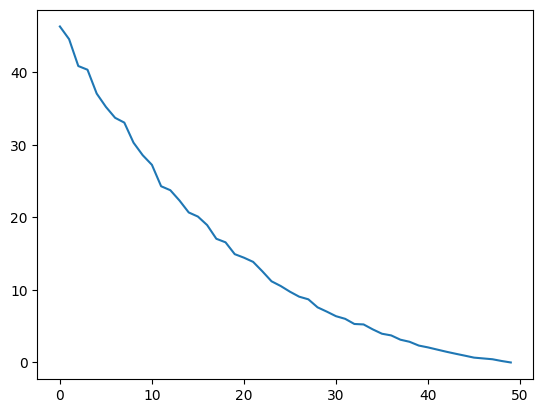

In [444]:
sns.lineplot(pca_2.explained_variance_)

In [208]:
pd.DataFrame(E_c[:2])
test.loc[50].shape

(60,)

In [190]:
E_c.shape, np.array(test).shape

((50, 60), (50, 60))

In [226]:
y_x = []
for i in test.index:
    y_test = E_c[:2] @ np.array(test.loc[i])
    # y_x = np.append(y_x, y_test)
    y_x.append(y_test)
    
y_bar_norm = pca_2.mean_
y_x = np.array(y_x)

(50, 2)

In [229]:
y_bar_norm.shape

(60,)

### FOR ANOMALY DETECTION
- let $y^-_normal$  be the mean vector of normal training samples. The anomaly is detected as follows:
*Compute the distance   for a test sample 
- Compute the distance $deltay_x = abs(y_x - y^-_normal)$  for a test sample x  


In [158]:
del_y = np.abs(y - y_bar_norm)
del_y

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
50,5.871192,4.06918,0.857784,5.223544,0.752074,0.201288,0.297228,2.855984,0.01417,4.443782,0.72383,6.021974,4.677976,5.66524,1.121004,6.537276,1.50964,1.008842,2.081442,1.367854,4.694722,3.26494,5.266318,4.97508,1.09967,5.813618,2.606244,4.404638,1.181064,0.462104,3.461364,3.422824,1.489168,3.454132,3.103896,2.996424,5.330898,2.462466,5.45522,2.25005,0.44774,1.770544,3.510282,4.496916,5.226116,2.108076,0.001418,0.028992,2.707344,3.444298,2.36533,4.269762,4.47296,4.110274,5.186042,5.299826,2.388378,2.380184,2.55845,4.480632
51,5.020992,4.15102,2.219216,1.050044,4.907526,0.634988,3.815972,5.885184,5.64187,6.643482,2.94223,5.639774,2.278276,5.87976,0.181496,1.073376,0.68554,4.368542,1.171442,5.831754,1.784122,1.44464,4.538782,2.32158,2.29167,3.968018,2.714144,4.436862,2.259436,4.616904,4.559436,2.896624,0.669868,1.779768,6.195896,1.889776,1.146802,0.908366,1.37432,1.35735,0.16434,2.637556,0.535318,1.115916,1.516084,4.322324,3.212482,1.273092,0.925544,0.472398,2.80847,5.324938,3.06986,3.053774,0.249142,4.646274,0.630878,3.346284,5.27365,4.840832
52,4.870792,4.62148,2.620216,0.487844,0.538326,5.798788,5.776228,1.440516,0.64987,2.664518,5.33423,5.143626,4.301624,1.84294,3.960004,1.143176,1.73944,5.277442,0.180258,1.216646,2.354378,1.52466,1.534582,5.17672,0.16913,5.148982,4.174944,2.539862,2.582764,0.185296,4.024764,5.540624,6.245068,2.065168,3.674896,1.471176,1.345902,0.700434,2.10398,5.46985,6.06034,1.906844,5.313218,6.182984,0.736784,1.428324,2.757182,6.139092,1.089356,4.747202,3.13393,1.446338,2.43086,2.789426,6.186742,4.465574,4.566422,4.059816,1.08475,1.375032
53,1.407108,1.49798,0.209416,4.005044,0.160126,5.578488,4.316528,1.586884,1.18677,1.348882,1.76407,0.773374,0.123024,0.90284,5.702296,4.249876,0.47804,0.407342,5.523358,1.653554,1.330178,2.26724,1.798582,0.27842,5.42583,2.918818,5.689656,3.713138,5.949936,2.787396,1.999164,3.988776,0.099968,1.916632,0.949804,4.647676,3.531902,0.979966,4.80518,3.61175,4.86144,4.459344,1.555282,0.491216,2.503484,0.065524,3.239682,1.286108,4.768156,1.215298,2.35567,1.322462,5.09854,3.547274,1.750742,3.244526,2.592878,3.958016,4.82815,3.003668
54,3.960892,4.02078,1.495816,4.941856,0.832074,2.021188,4.758228,3.958516,0.27073,5.497682,0.92757,3.250274,4.141124,4.67784,0.922596,5.325076,4.95086,2.633558,3.931758,0.693346,5.667778,4.35376,4.401218,2.60688,5.71087,2.242818,5.446856,0.187462,5.419164,0.301296,0.777064,5.846576,5.476768,1.095132,2.787804,1.243476,1.539398,2.715734,4.18432,1.32615,2.21236,4.560344,3.724382,2.859984,2.307816,0.235224,3.462418,3.566908,1.320356,4.798302,0.89637,3.144262,3.52504,6.253426,3.102842,2.425674,0.012122,4.954684,2.29075,0.101932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.213708,0.72968,5.269884,3.377444,1.065274,5.935088,5.625628,0.734584,3.88907,0.196418,0.18327,3.413726,2.667124,1.36884,2.270004,6.762376,0.90954,5.528942,3.577458,1.711954,2.315478,0.55006,1.023518,2.94112,2.54167,1.881482,0.362756,4.285562,3.976536,4.138404,5.608164,1.721176,15.229568,11.377568,5.356904,5.006476,16.975902,15.324634,16.09808,14.52705,7.36016,6.038444,13.681682,12.357484,6.410116,16.877724,5.168618,11.839592,15.642044,7.472798,16.50067,6.947438,8.61056,10.234074,7.705258,11.997774,8.393978,8.127216,14.07595,12.823568
296,2.649492,5.64718,4.626184,3.653644,1.391026,5.785988,5.863228,0.738584,5.52547,3.234718,0.95987,4.270026,3.623024,5.08326,4.985496,5.634976,0.41934,5.095058,2.240042,1.768246,1.158422,3.70524,4.038982,3.55758,1.97507,2.375018,0.815156,1.544338,1.864636,0.243304,2.403064,3.216876,3.512168,0.882932,23.361104,15.022576,19.864302,23.868534,20.87428,20.76555,21.67226,21.966044,22.319182,17.53

## REMOVE 1st COMPONETS